In [9]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import TypedDict

In [2]:
class Graphstate(TypedDict):
    department: str
    message: str
    response: str

In [3]:
def router(state: Graphstate):
    department = state["department"].lower()
    if department == "devops":
        return "devops_department"
    elif department == "hardware":
        return "hardware_department"
    
def devops_department(state: Graphstate):
    state["response"] = (
        f"Thanks for reaching out regarding: '{state["message"]}'.\n"
        "I've just received your request and will restart the Docker image now. "
        "Once it's back up, I'll confirm that everything is running smoothly."
    )
    return state

def hardware_department(state: Graphstate):
    state["response"] = (
        f"I've noted your message: '{state["message"]}'.\n"
        "To assist you further, could you please let me know the available RAM on your PC? "
        "This will help me diagnose the issue more accurately."
    )
    return state

In [4]:
workflow = StateGraph(Graphstate)

workflow.add_node("devops_department", devops_department)
workflow.add_node("hardware_department", hardware_department)

workflow.add_conditional_edges(START, router, ["devops_department", "hardware_department"])
workflow.add_edge("devops_department", END)
workflow.add_edge("hardware_department", END)

graph_compile = workflow.compile()

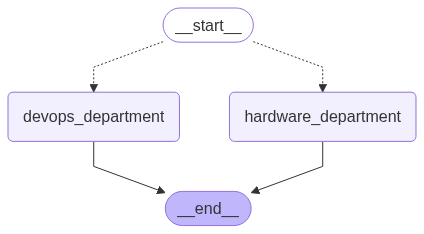

In [10]:
display(Image(graph_compile.get_graph().draw_mermaid_png()))

## For Hardware issue

In [5]:
response = graph_compile.invoke(
    {
        "department": "hardware",
        "message": "Hey PowerBI is running really slow on my PC",
    }
)

In [6]:
response

{'department': 'hardware',
 'message': 'Hey PowerBI is running really slow on my PC',
 'response': "I've noted your message: 'Hey PowerBI is running really slow on my PC'.\nTo assist you further, could you please let me know the available RAM on your PC? This will help me diagnose the issue more accurately."}

## For Devops issue

In [7]:
response = graph_compile.invoke(
    {
        "department": "devops",
        "message": "Hey chatwoot is not working",
    }
)

In [8]:
response

{'department': 'devops',
 'message': 'Hey chatwoot is not working',
 'response': "Thanks for reaching out regarding: 'Hey chatwoot is not working'.\nI've just received your request and will restart the Docker image now. Once it's back up, I'll confirm that everything is running smoothly."}